In [423]:
# check if the variables are correlated with each other

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#df = pd.read_csv('data/combined.csv',encoding='latin-1',keep_default_na=False,na_values=['..','#N/A'])
df = pd.read_csv('data/country.csv',encoding='latin-1',keep_default_na=False,na_values=['..','#N/A'])
df = df.drop(columns=['Numeric','Lat','Long'])
df = df.rename(columns={'gdp': 'GDP'})
print(df)

                      Country alpha-2 Alpha-3 code           GDP  \
0                 Afghanistan      AF          AFG    524.162881   
1                     Albania      AL          ALB   5284.380184   
2                     Algeria      DZ          DZA   4114.715061   
3              American Samoa      AS          ASM  11466.690710   
4                     Andorra      AD          AND  41793.055260   
..                        ...     ...          ...           ...   
211  Virgin Islands (British)      VG          VGB           NaN   
212     Virgin Islands (U.S.)      VI          VIR           NaN   
213                     Yemen      YE          YEM    968.159048   
214                    Zambia      ZM          ZMB   1556.334482   
215                  Zimbabwe      ZW          ZWE   1683.740577   

     Population (2019)  Literacy Rate Age 15+ (2018)  Internet Rate (2017)  \
0           38041754.0                     43.019718             11.447688   
1            2854191.0     

In [424]:
corr = df.corr().abs()

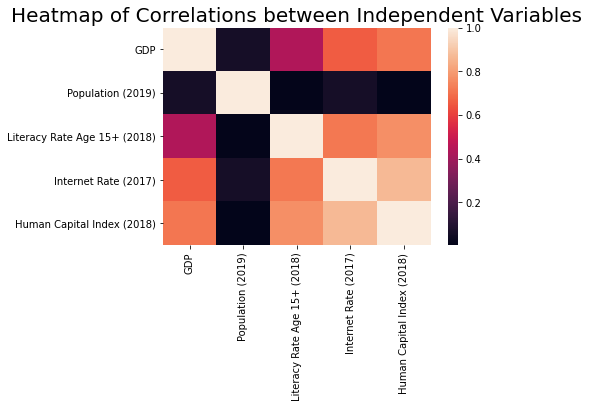

In [425]:
#Country correlations
import seaborn as sns
ax = plt.axes()
sns.heatmap(corr, ax=ax)

ax.set_title('Heatmap of Correlations between Independent Variables', fontsize=20)
plt.show()

In [426]:
pairwise_df = pd.read_csv('data/pairwise.csv',encoding='latin-1')
pairwise_df_norank = pairwise_df.drop(columns=['user_loc','fr_loc','scaled_sci','sci_ranked','population_diff_ranked','trade_ranked'])
print(pairwise_df_norank.head(15))

    migrants_from_fr     gdp_diff  population_diff  literacy_dif  \
0                NaN      0.00000              0.0           NaN   
1                NaN  27112.37554        9673411.0           NaN   
2                NaN  38554.97617        6916338.0           NaN   
3                NaN  39618.86607        6812798.0           NaN   
4                NaN  40549.70969       22054766.0           NaN   
5                NaN  32155.40673       35168183.0           NaN   
6                NaN   7685.69008         893462.0           NaN   
7                NaN  13556.56312       15593778.0           NaN   
8                NaN          NaN        9664215.0           NaN   
9                NaN  39099.51464         252789.0           NaN   
10               NaN  37767.17536        6469529.0           NaN   
11               NaN  26094.16289        9483504.0           NaN   
12         1044505.0  42141.00596      153275632.0           NaN   
13               NaN   3651.96691        1713526

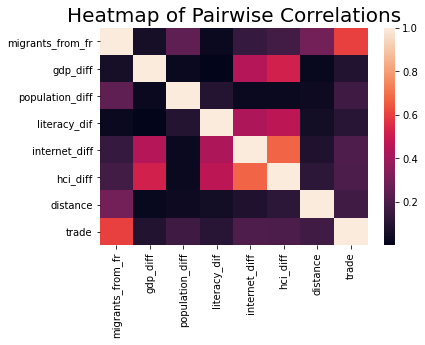

In [427]:
#Pairwise correlation heatmap

corr2 = pairwise_df_norank.corr(method='spearman').abs()
ax = plt.axes()
sns.heatmap(corr2, ax=ax)
ax.set_title('Heatmap of Pairwise Correlations', fontsize=20)
plt.show()

                     Correlation with SCI
Distance                        -0.515530
Migration                        0.436900
Trade                            0.312518
Human Capital Index             -0.283469
Internet Access                 -0.208614
Population                      -0.136050
GDP Per Capita                   0.013357
Literacy                        -0.006493


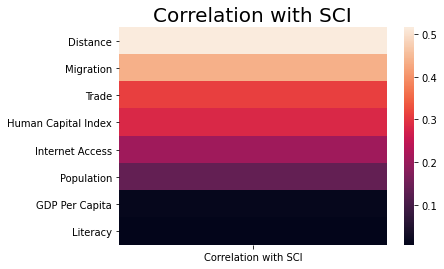

In [428]:
#Final correlation results

pairwise_df = pairwise_df.drop(columns=['user_loc','fr_loc','sci_ranked','population_diff_ranked','trade_ranked'])
corr_matrix = pairwise_df.corr(method='spearman')
corr_matrix = corr_matrix.drop(['scaled_sci'])
#Sort by absolute value
corr_matrix = corr_matrix.reindex(corr_matrix.scaled_sci.abs().sort_values(ascending=False).index)
corr_matrix = corr_matrix.rename(columns={'scaled_sci':"Correlation with SCI"},index={'migrants_from_fr':'Migration','gdp_diff':'GDP Per Capita','population_diff':'Population','literacy_dif':'Literacy', 'internet_diff':'Internet Access','hci_diff':'Human Capital Index','trade':'Trade','distance':"Distance"})

print(corr_matrix[['Correlation with SCI']])

#Just for fun?
ax = plt.axes()
sns.heatmap(corr_matrix[['Correlation with SCI']].abs(), ax=ax)
ax.set_title('Correlation with SCI', fontsize=20)
plt.show()

